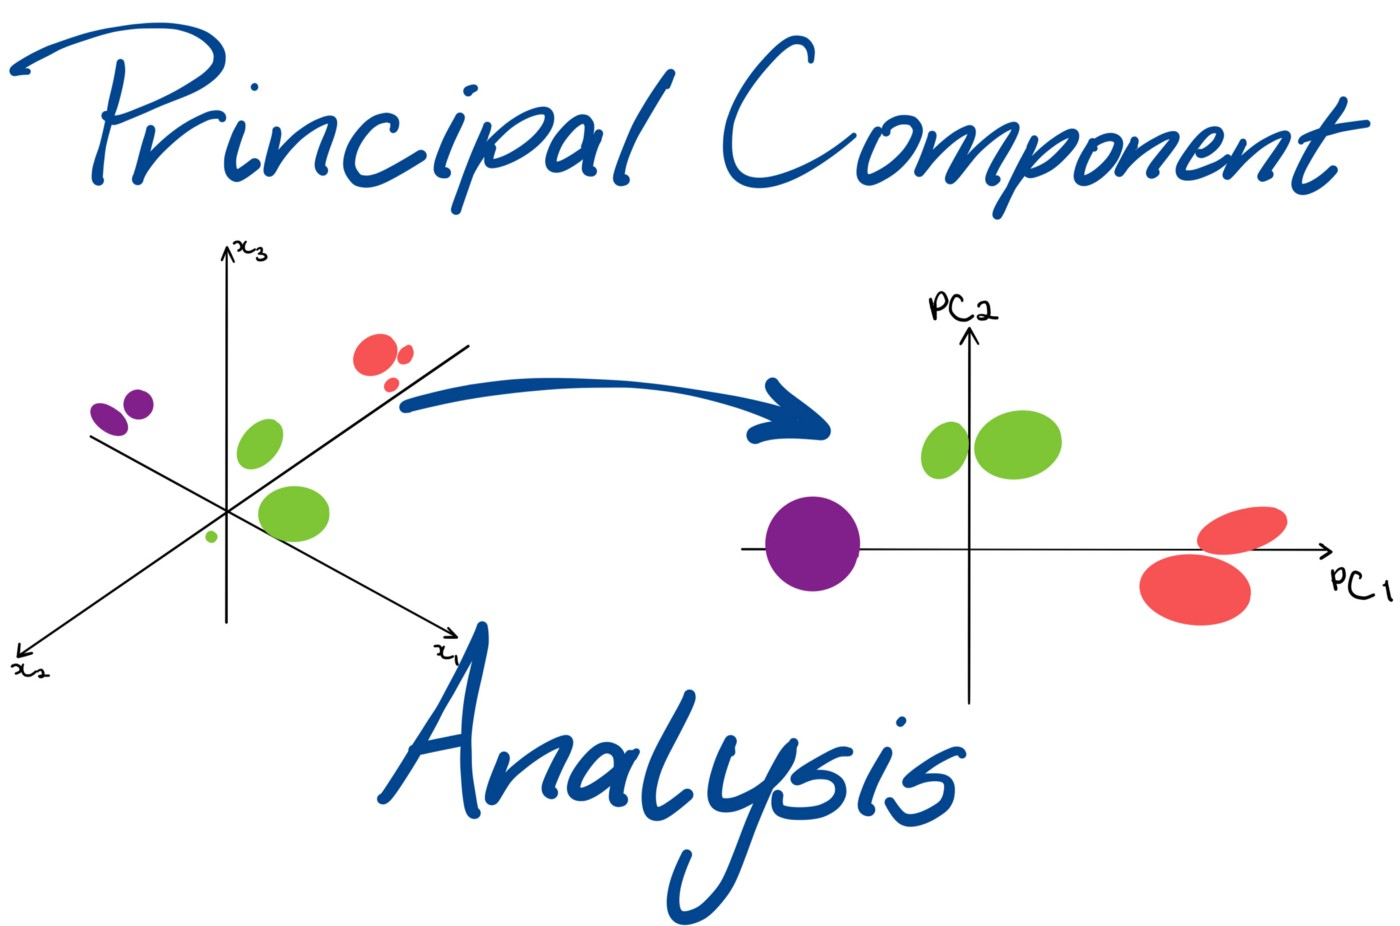

In [8]:
import numpy as np
import pandas as pd


import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Principal Components Analysis

In this lab, we perform PCA on the [USArrests](https://www.rdocumentation.org/packages/datasets/versions/3.6.2/topics/USArrests) data set. The rows of the data set contain the 50 states, in alphabetical order.

In [3]:
url = 'https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/USArrests.csv'
USArrests = pd.read_csv(url, index_col='Unnamed: 0')
USArrests.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


The columns of the data set contain the four variables.

In [4]:
list(USArrests)

['Murder', 'Assault', 'UrbanPop', 'Rape']

We first briefly examine the data. We notice that the variables have vastly different means.

In [5]:
USArrests.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

We see that there are on average three times as many rapes as murders, and more than eight times as many assaults as rapes.
We can also examine the variances of the four variables.

In [6]:
USArrests.var()

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

Not surprisingly, the variables also have vastly different variances: the `UrbanPop` variable measures the percentage of the population in each state living in an urban area, which is not a comparable number to the number of rapes in each state per 100,000 individuals. If we failed to scale the variables before performing PCA, then most of the principal components
that we observed would be driven by the `Assault` variable, since it has by far the largest mean and variance. Thus, it is important to standardize the variables to have mean zero and standard deviation one before performing PCA.

We now perform principal components analysis using the `PCA()` function.

In [10]:
df = pd.DataFrame(StandardScaler().fit_transform(USArrests))
df.columns = USArrests.columns
pca = PCA(n_components=4)
pca_data = pca.fit_transform(df)
principalDf = pd.DataFrame(data = pca_data, columns = ['PC1', 'PC2', 'PC3', 'PC4'])
principalDf.head()

,PC1,PC2,PC3,PC4
0,0.985566,1.133392,-0.444269,0.156267
1,1.950138,1.073213,2.040003,-0.438583
2,1.763164,-0.745957,0.054781,-0.834653
3,-0.141420,1.119797,0.114574,-0.182811
4,2.523980,-1.542934,0.598557,-0.341996


First we create a new data frame with centered variables to have mean zero. By using the `StandardScaler()`, we scale the variables to have standard deviation one. The output from `PCA()` contains a number of useful quantities.

In [11]:
principalDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     50 non-null     float64
 1   PC2     50 non-null     float64
 2   PC3     50 non-null     float64
 3   PC4     50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


The `pca.components_` matrix provides the principal component loadings; each column of `pca.components_` contains the corresponding principal component loading vector. It gives us the coordinates of the data in the rotated coordinate system. These coordinates are the principal component scores.

In [12]:
loadings = pca.components_.T
loadings_df = pd.DataFrame(loadings, index=df.columns, columns=principalDf.columns)
loadings_df

,PC1,PC2,PC3,PC4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


We see that there are four distinct principal components. This is to be expected because there are in general $min(n − 1, p)$ informative principal components in a data set with $n$ observations and $p$ variables.

Using the `PCA()` function, we do not need to explicitly multiply the data by the principal component loading vectors in order to obtain the principal component score vectors. Rather the $50 × 4$ matrix `x` has as its columns the principal component score vectors. That is, the $k$th column is the $k$th principal component score vector.

In [13]:
principalDf.shape

(50, 4)

We can plot the first two principal components as follows:

In [14]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0, shrinkC=0, shrinkD=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

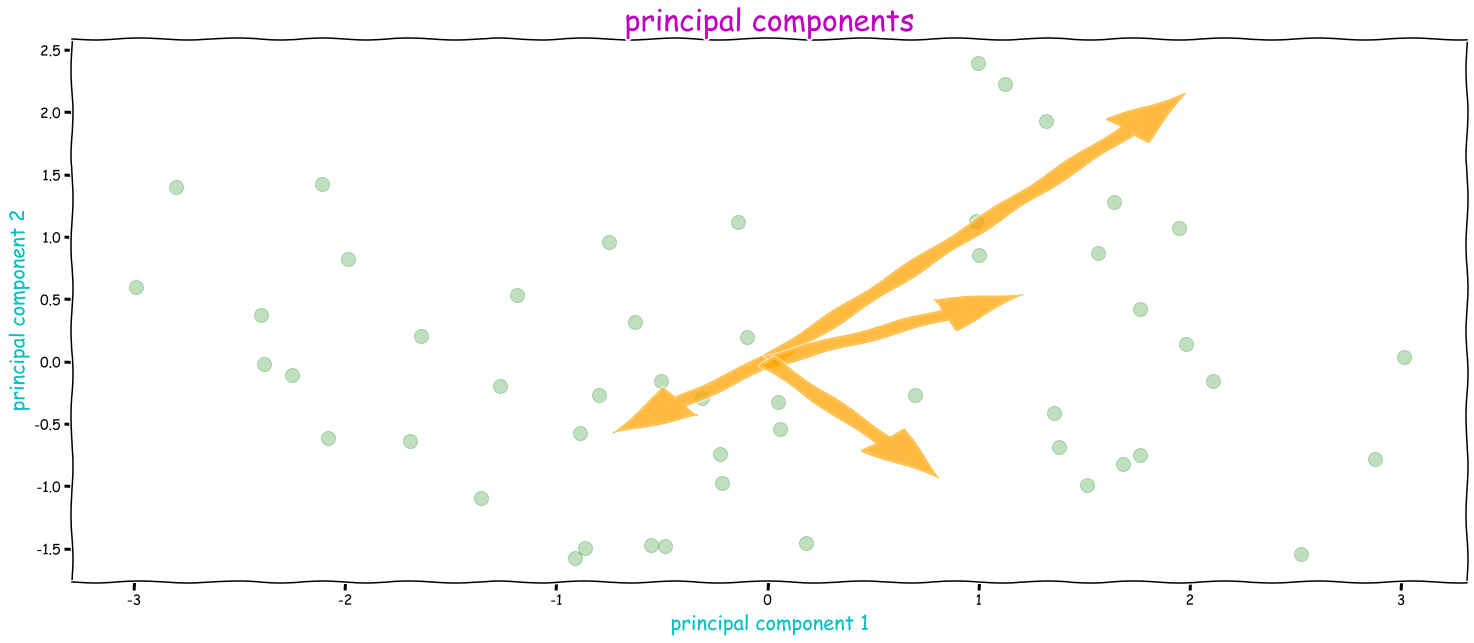

In [22]:
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.scatter(principalDf['PC1'], principalDf['PC2'], alpha=0.25, s=200, color='green')
plt.title('principal components', fontsize=30, color='m')
plt.xlabel('principal component 1', fontsize=20, color='c')
plt.ylabel('principal component 2', fontsize=20, color='c')
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 2 * np.sqrt(length)
    arrow = plt.arrow(0, 0, pca.mean_[0] + v[0], pca.mean_[1] + v[1], label='mylabel', 
                      width=0.09, facecolor='orange', edgecolor='orange', alpha=0.5, )

The `PCA()` function also outputs the standard deviation of each principal component. For instance, on the `USArrests` data set, we can access these standard deviations as follows:

In [16]:
PSTD = np.sqrt(pca.explained_variance_)
PSTD

array([1.5908673 , 1.00496987, 0.6031915 , 0.4206774 ])

The variance explained by each principal component is obtained by squaring these. We can also get them out by using the `explained_variance_` command.

In [17]:
PEV = pca.explained_variance_
PEV

array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

To compute the proportion of variance explained by each principal component, we simply divide the variance explained by each principal component by the total variance explained by all four principal components. Again, python provides a convenient `explained_variance_ratio_` command.

In [18]:
PVE = pca.explained_variance_ratio_
PVE

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

We see that the first principal component explains 62.0 % of the variance in the data, the next principal component explains 24.7 % of the variance, and so forth. We can plot the PVE explained by each component, as well as the cumulative PVE, as follows:

Text(0.5, 1.0, 'principal components cumulative explained variance')

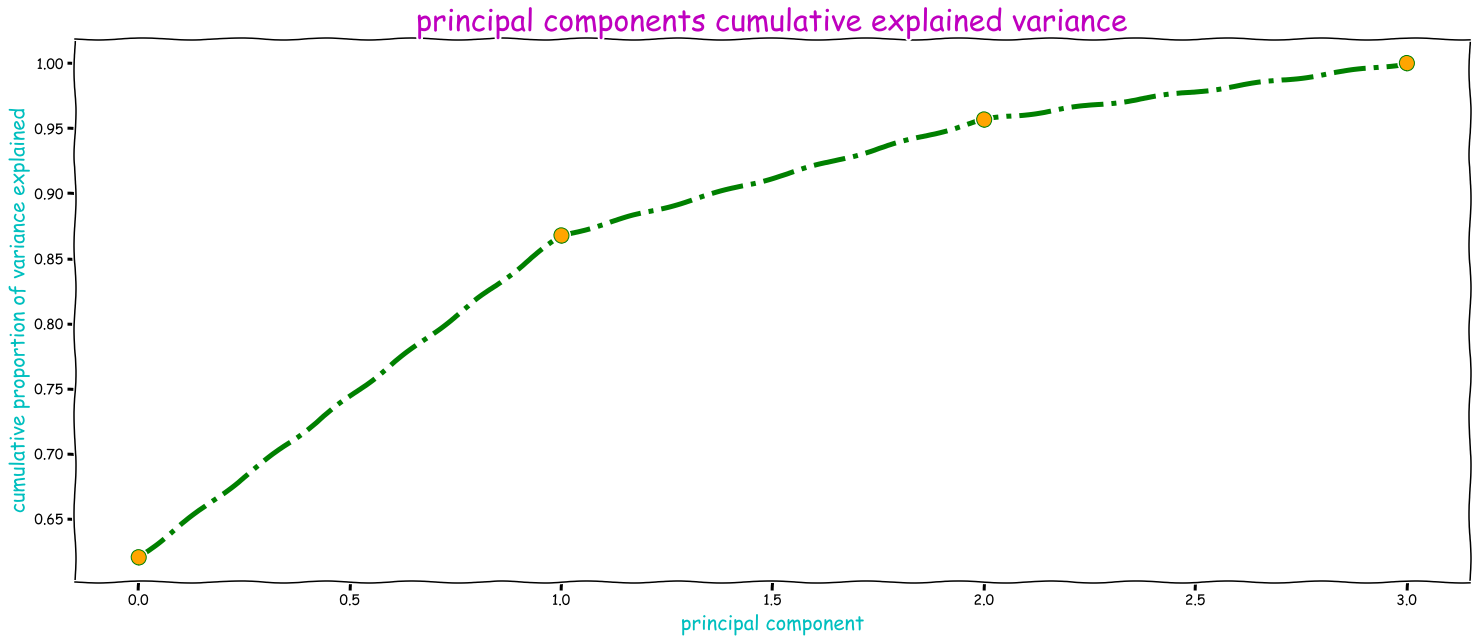

In [19]:
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.plot(np.cumsum(PVE), lw=5.0, ls='-.', color='g', marker='o', markersize=15, markerfacecolor='orange')
plt.xlabel('principal component', fontsize=20, color='c')
plt.ylabel('cumulative proportion of variance explained', fontsize=20, color='c')
plt.title('principal components cumulative explained variance', fontsize=30, color='m')

The result is shown in the above figure. Note that the function `cumsum()` computes the cumulative sum of the elements of a numeric vector. For instance:

In [20]:
a=np.array([1, 2, 8, -3])
np.cumsum(a)

array([ 1,  3, 11,  8], dtype=int32)